In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import multivariate_normal

In [2]:
with open('gmm_data.json', 'r') as file:
    gmm_data = json.load(file)

In [3]:
weights=gmm_data["weights"]
means =gmm_data["means"]
covariances = gmm_data["covariances"]

In [11]:
len(weights)

6

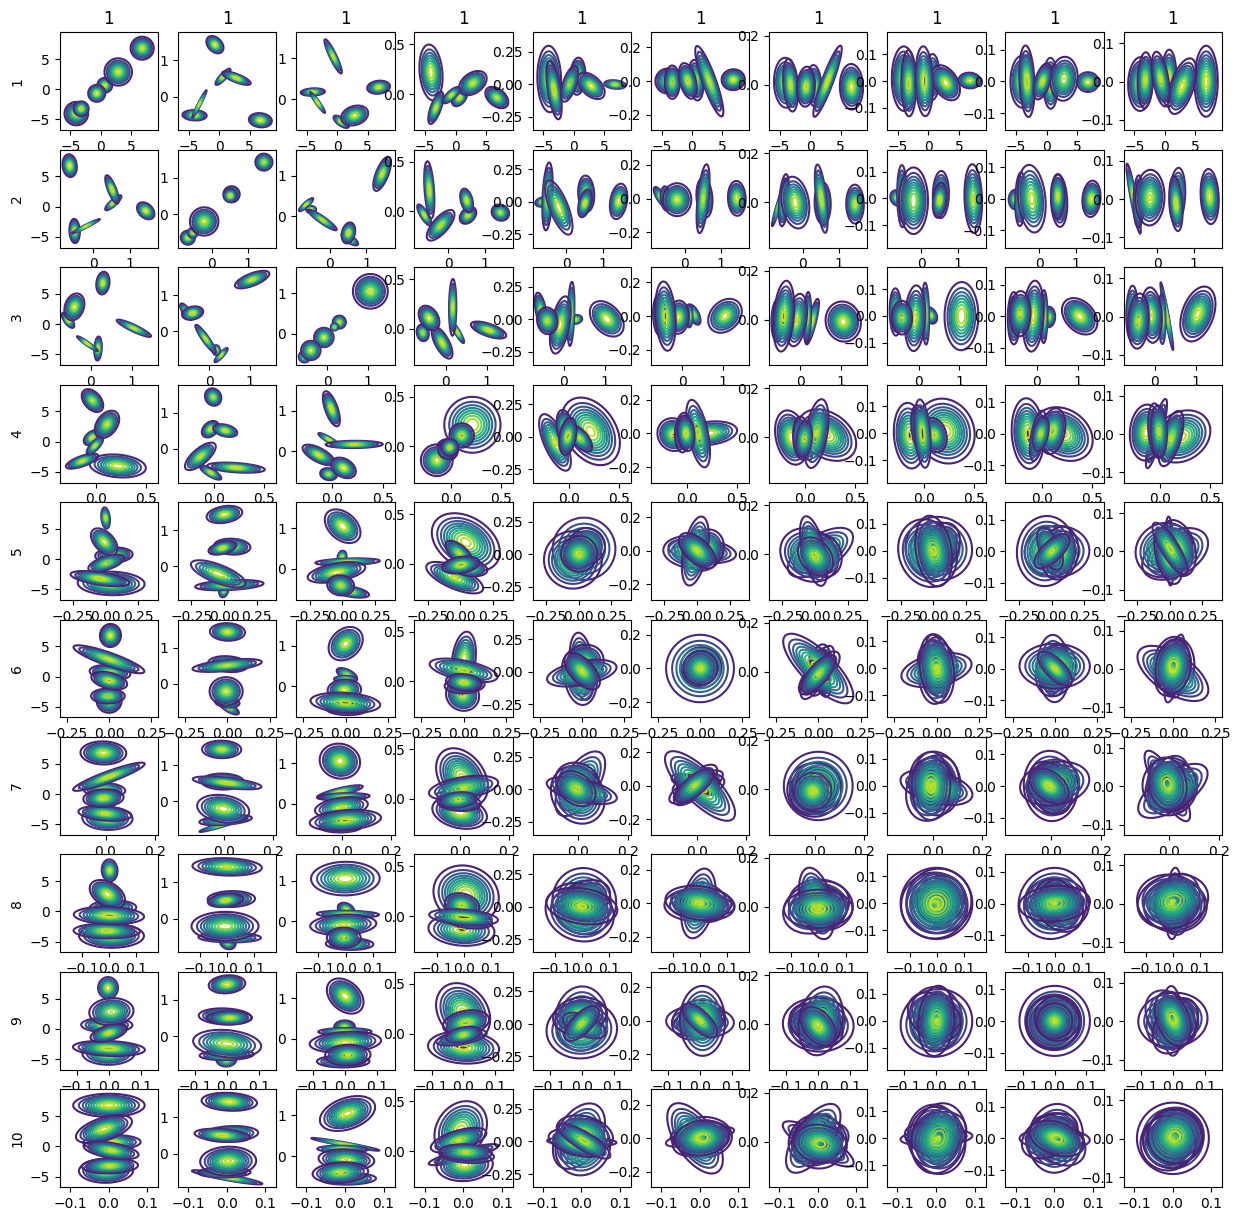

In [7]:
K = len(weights)
D = len(means[0])

n =3

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(15, 15))
#fig.suptitle(f'Cluster {i+1}', fontsize=16)
label_to_color = { 0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 4: 'orange', 5: 'purple'}
for i in range(K):
    # Create different plot of each cluster
    
    for j in range(D):
        for k in range(D):
            if j==k:
                mean_ = np.array([means[i][j],means[i][k]])
                cov_  = np.diag([covariances[i][j][j], covariances[i][k][k]])
                
                # Create a grid of points
                x, y = np.meshgrid(np.linspace(mean_[0] -n * np.sqrt(cov_[0][0]), mean_[0] +n * np.sqrt(cov_[0][0]), 1000), np.linspace(mean_[1]-n * np.sqrt(cov_[1][1]), mean_[1]+ n * np.sqrt(cov_[1][1]), 1000))
                pos = np.dstack((x, y))
                # Create the multivariate normal distribution
                rv = multivariate_normal(mean_, cov_)
                # Compute the probability density function (PDF) at the grid points
                pdf = rv.pdf(pos)
                axes[j][k].contour(x, y, pdf, levels=1, cmap='viridis')
                #axes[j][k].set_title(f'{j+1}')
                # axes[j][k].set_xlabel(f'{j+1}')
                # axes[j][k].set_ylabel(f'{j+1}')
            else:
                mean_ = np.array([means[i][j],means[i][k]])
                cov_  = np.array([[covariances[i][j][j],covariances[i][j][k]],[covariances[i][k][j], covariances[i][k][k]]])
                
                # Create a grid of points
                x, y = np.meshgrid(np.linspace(mean_[0] -n * np.sqrt(cov_[0][0]), mean_[0] +n * np.sqrt(cov_[0][0]), 1000), np.linspace(mean_[1]-n * np.sqrt(cov_[1][1]), mean_[1]+ n * np.sqrt(cov_[1][1]), 1000))
                pos = np.dstack((x, y))
                # Create the multivariate normal distribution
                rv = multivariate_normal(mean_, cov_)
                # Compute the probability density function (PDF) at the grid points
                pdf = rv.pdf(pos)
                axes[j][k].contour(x, y, pdf, levels=1, cmap='viridis')
                #axes[j][k].set_title(f'{j+1} vs{k+1}')
                # axes[j][k].set_xlabel(f'{k+1}')
                # axes[j][k].set_ylabel(f'{j+1}')
            if j==0:
                axes[j][k].set_title(f'{j+1}')
            if k==0:
                axes[j][k].set_ylabel(f'{j+1}')
            
            
plt.show() 